[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


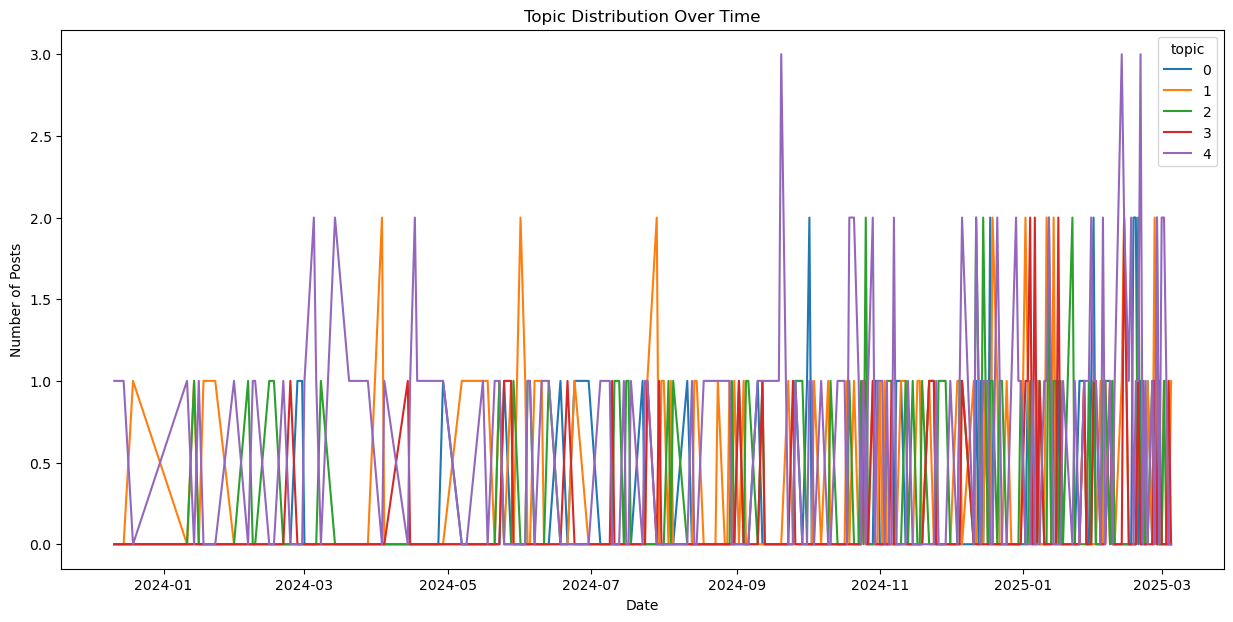

Topic 0:
police bus septum stop medical man route issue hear interview
Topic 1:
septum th bus work train app new trenton line get
Topic 2:
boulevard roosevelt septum subway alternative train app late parking regional
Topic 3:
septum test start offer process letter long got since come
Topic 4:
septum card rail train regional bus station app get would


In [2]:
import praw
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import datetime
import creds

# Reddit API credentials
reddit = praw.Reddit(
    client_id=creds.CLIENT_ID,
    client_secret=creds.CLIENT_SECRET,
    user_agent=creds.USER_AGENT,
)

# Subreddit and time range
subreddit_name = "septa"
start_date = datetime.datetime(2023, 1, 1)
end_date = datetime.datetime.now()

# Fetch posts
posts = []
for submission in reddit.subreddit(subreddit_name).new(limit=None):
    submission_time = datetime.datetime.fromtimestamp(submission.created_utc)
    if start_date <= submission_time <= end_date:
        posts.append(
            {
                "title": submission.title,
                "selftext": submission.selftext,
                "created_utc": submission_time,
            }
        )
    elif submission_time < start_date:
        break

df = pd.DataFrame(posts)

# Text preprocessing
nltk.download("stopwords")
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))


def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(text)


df["processed_text"] = df["title"].apply(preprocess_text) + " " + df["selftext"].apply(
    preprocess_text
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000)
tfidf = vectorizer.fit_transform(df["processed_text"])

# LDA
num_topics = 5  # Adjust as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf)

# Topic distribution
topic_values = lda.transform(tfidf)
df["topic"] = topic_values.argmax(axis=1)

# Time-based analysis
df["date"] = df["created_utc"].dt.date
topic_counts = df.groupby(["date", "topic"]).size().unstack(fill_value=0)

# Plotting
topic_counts.plot(kind="line", figsize=(15, 7))
plt.title("Topic Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.show()

# Displaying top words for each topic.
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(
        " ".join([feature_names[i] for i in topic.argsort()[:-10 - 1 : -1]])
    )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top 10 Keywords:
['septum', 'bus', 'process', 'test', 'train', 'manager', 'trolley', 'man', 'network', 'looking']


/tmp/ipykernel_2310/2361314408.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["date"] = filtered_df["created_utc"].dt.date


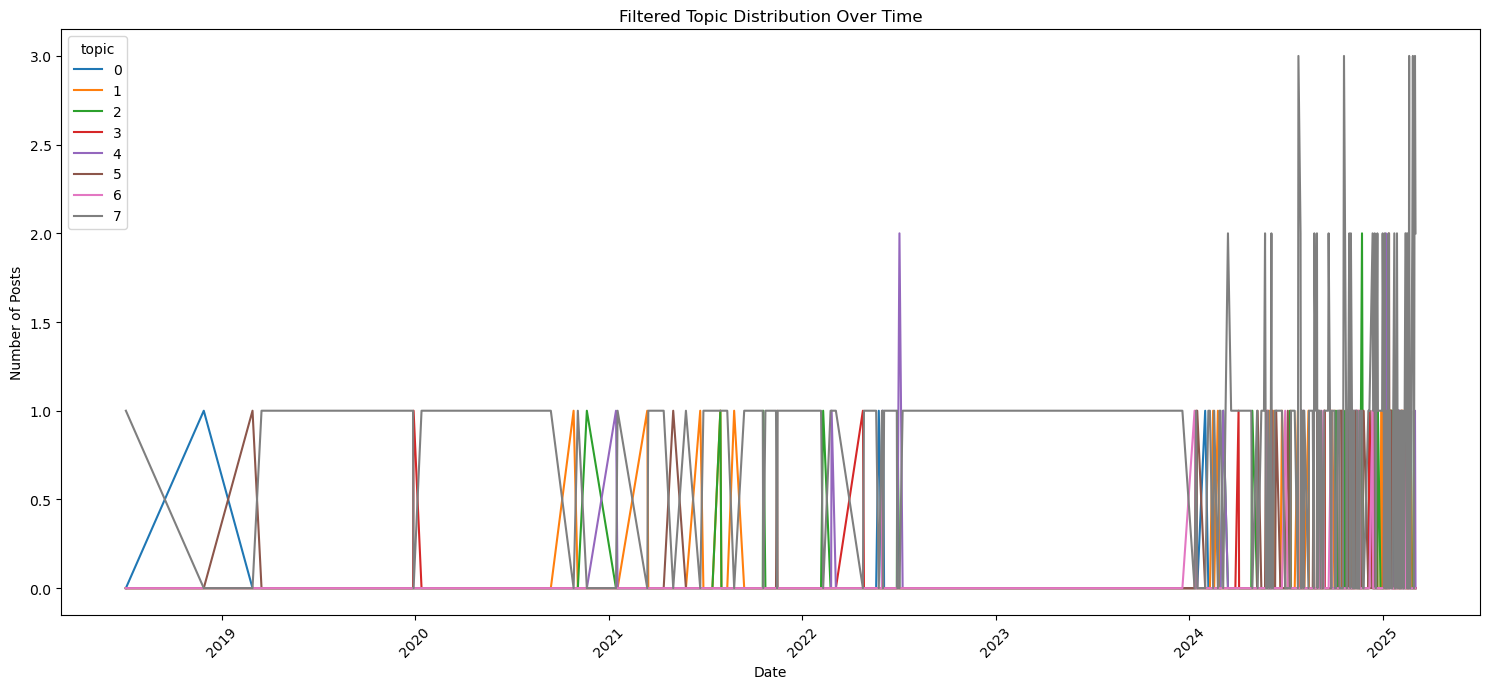

Topic 0:
manager trolley man network looking septum franklin find shot block
Topic 1:
police septum bus process lost test get start driver passed
Topic 2:
septum bus process without title weekly test rare route actually
Topic 3:
septum hall interview resident test roosevelt walk boulevard follow rate
Topic 4:
http com bus www septum sticker space side org know
Topic 5:
septum subway clean bus driver position usa ever service job
Topic 6:
longer arrive study test train ever late road guide sunday
Topic 7:
septum card train rail regional line station key app work


In [14]:
import praw
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import datetime
import creds
from collections import Counter

# Reddit API credentials
reddit = praw.Reddit(
    client_id=creds.CLIENT_ID,
    client_secret=creds.CLIENT_SECRET,
    user_agent=creds.USER_AGENT,
)

# Subreddit and time range
subreddit_name = "septa"
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime.now()

# Fetch posts
posts = []
for submission in reddit.subreddit(subreddit_name).new(limit=None):
    submission_time = datetime.datetime.fromtimestamp(submission.created_utc)
    if start_date <= submission_time <= end_date:
        title = getattr(submission, 'title', '')
        selftext = getattr(submission, 'selftext', '')
        posts.append(
            {
                "title": title,
                "selftext": selftext,
                "created_utc": submission_time,
            }
        )
    elif submission_time < start_date:
        break

df = pd.DataFrame(posts)

# Text preprocessing
nltk.download("stopwords")
nltk.download("wordnet")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
    return " ".join(text)

if not df.empty:
    df["processed_text"] = df["title"].apply(preprocess_text) + " " + df["selftext"].apply(
        preprocess_text
    )

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000)
    tfidf = vectorizer.fit_transform(df["processed_text"])

    # LDA
    num_topics = 8
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf)

    # Topic distribution
    topic_values = lda.transform(tfidf)
    df["topic"] = topic_values.argmax(axis=1)

    # Get top keywords for each topic
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic in lda.components_:
        top_words_indices = topic.argsort()[:-5 - 1 : -1]  # Get top 5 words
        top_words = [feature_names[i] for i in top_words_indices]
        topic_keywords.extend(top_words)

    # Get most frequent keywords
    keyword_counts = Counter(topic_keywords)
    most_frequent_keywords = [word for word, count in keyword_counts.most_common(10)]  # Get top 10 keywords

    print("Top 10 Keywords:")
    print(most_frequent_keywords)

    # Filter posts based on frequent keywords
    filtered_df = df[df["processed_text"].apply(
        lambda text: any(keyword in text for keyword in most_frequent_keywords))]

    if not filtered_df.empty:
        # Time-based analysis
        filtered_df["date"] = filtered_df["created_utc"].dt.date
        topic_counts = filtered_df.groupby(["date", "topic"]).size().unstack(fill_value=0)

        # Plotting
        topic_counts.plot(kind="line", figsize=(15, 7))
        plt.title("Filtered Topic Distribution Over Time")
        plt.xlabel("Date")
        plt.ylabel("Number of Posts")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Displaying top 10 words for each topic.
        for topic_idx, topic in enumerate(lda.components_):
            print(f"Topic {topic_idx}:")
            top_words_indices = topic.argsort()[:-10 - 1 : -1]
            top_words = [feature_names[i] for i in top_words_indices]
            print(" ".join(top_words))
    else:
        print("No posts found matching the frequent keyword criteria.")

else:
    print("No posts found matching the specified criteria.")

In [ ]:
 # Complaint classifier training (Replace with your labeled data)
    # create dummy data, in a real world application, you will need to replace this.
    complaint_data = pd.DataFrame({
        'text': df['processed_text'],
        'is_complaint': [1 if 'bad' in text or 'delay' in text else 0 for text in df['processed_text']]
    })

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


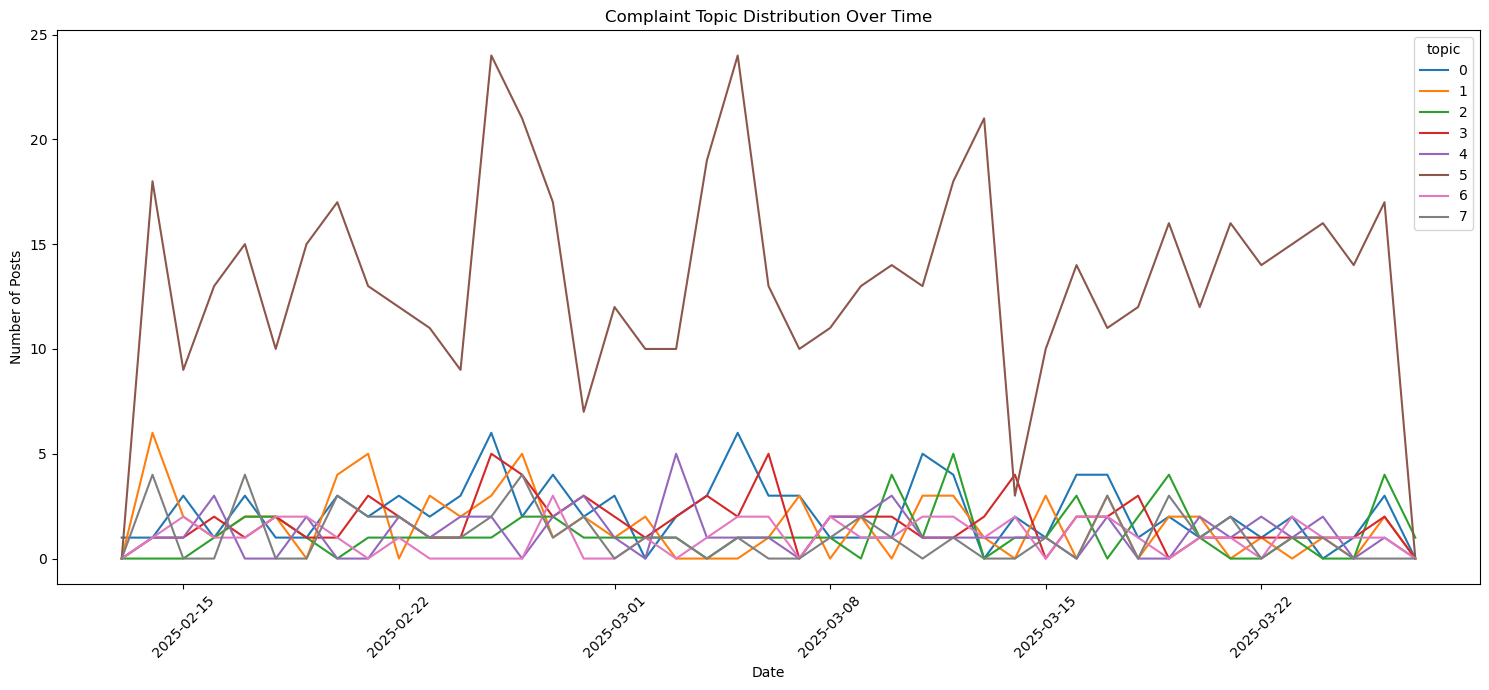

Topic 0:
http png card format redd webp auto preview width omny
Topic 1:
street train rare took station dump shot photo seat pricing
Topic 2:
rush hour ave madison seen orange central grand queenslink train
Topic 3:
new card fare metro omny train north fair station one
Topic 4:
brighton cool today blue train bmt cbtc sign liberty car
Topic 5:
train line subway station know like mta anyone street would
Topic 6:
redbird thing feasible via funny tremont section little return extension
Topic 7:
herald know mta shuttle culver crazy anyone online gone screen

Semantic Analysis Example:
Post: someone get footage tomorrow 
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)


In [19]:
import praw
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import datetime
import creds
from collections import Counter
from textblob import TextBlob  # For semantic analysis

def classify_complaints(df):
    """Trains a Naive Bayes classifier to identify complaint posts."""
    complaint_data = pd.DataFrame({
        'text': [
            "The train was late again, this is unacceptable!",
            "I had a great experience with the service today.",
            "The bus was so crowded and dirty.",
            "Just a regular day on the subway.",
            "This delay is ridiculous, I'm going to be late for work.",
            "Everything went smoothly, no complaints.",
            "The fare is too expensive!",
            "I saw a fight on the train, I felt unsafe.",
            "The train was on time today.",
            "The service was rude, I'm never using this again."
        ],
        'is_complaint': [1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
    })  # Replace with your labeled data

    X_train, X_test, y_train, y_test = train_test_split(
        complaint_data['text'], complaint_data['is_complaint'], test_size=0.2, random_state=42
    )
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    classifier = MultinomialNB()
    classifier.fit(X_train_vec, y_train)
    return classifier, vectorizer

def identify_complaint(post_text, classifier, vectorizer):
    """Identifies if a new post is a complaint."""
    return classifier.predict(vectorizer.transform([post_text]))[0]

def lda_topic_model(complaint_df):
    """Performs LDA topic modeling on complaint posts."""
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=5000)
    tfidf = vectorizer.fit_transform(complaint_df['processed_text'])

    num_topics = 8
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf)

    topic_values = lda.transform(tfidf)
    complaint_df['topic'] = topic_values.argmax(axis=1)

    return complaint_df, vectorizer, lda

def semantic_analysis(text):
    """Performs semantic analysis on the text."""
    blob = TextBlob(text)
    return blob.sentiment

def plot_topic_models(complaint_df):
    """Plots topic models of complaint posts over time."""
    complaint_df['date'] = complaint_df['created_utc'].dt.date
    topic_counts = complaint_df.groupby(['date', 'topic']).size().unstack(fill_value=0)

    topic_counts.plot(kind='line', figsize=(15, 7))
    plt.title('Complaint Topic Distribution Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Posts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    """Main function to orchestrate the process."""
    reddit = praw.Reddit(
        client_id=creds.CLIENT_ID,
        client_secret=creds.CLIENT_SECRET,
        user_agent=creds.USER_AGENT,
    )

    subreddit_name = "nycrail"
    start_date = datetime.datetime(2018, 1, 1)
    end_date = datetime.datetime.now()

    posts = []
    for submission in reddit.subreddit(subreddit_name).new(limit=None):
        submission_time = datetime.datetime.fromtimestamp(submission.created_utc)
        if start_date <= submission_time <= end_date:
            title = getattr(submission, 'title', '')
            selftext = getattr(submission, 'selftext', '')
            posts.append({
                "title": title,
                "selftext": selftext,
                "created_utc": submission_time,
            })
        elif submission_time < start_date:
            break

    df = pd.DataFrame(posts)

    if not df.empty:
        nltk.download("stopwords")
        nltk.download("wordnet")
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words("english"))

        def preprocess_text(text):
            if not isinstance(text, str):
                return ""
            text = re.sub(r"[^a-zA-Z]", " ", text)
            text = text.lower()
            text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
            return " ".join(text)

        df["processed_text"] = df["title"].apply(preprocess_text) + " " + df["selftext"].apply(preprocess_text)

        classifier, vectorizer = classify_complaints(df)

        df['is_complaint'] = df['processed_text'].apply(lambda text: identify_complaint(text, classifier, vectorizer))

        complaint_df = df[df['is_complaint'] == 1]

        if not complaint_df.empty:
            complaint_df, vectorizer_lda, lda = lda_topic_model(complaint_df)

            plot_topic_models(complaint_df)

            feature_names_lda = vectorizer_lda.get_feature_names_out()
            for topic_idx, topic in enumerate(lda.components_):
                print(f'Topic {topic_idx}:')
                top_words_indices = topic.argsort()[:-10 - 1 : -1]
                top_words = [feature_names_lda[i] for i in top_words_indices]
                print(' '.join(top_words))

            # Example of semantic analysis
            print("\nSemantic Analysis Example:")
            example_post = complaint_df['processed_text'].iloc[0] #Take the first complaint post.
            sentiment = semantic_analysis(example_post)
            print(f"Post: {example_post}")
            print(f"Sentiment: {sentiment}")

        else:
            print('No complaint posts found.')
    else:
        print('No posts found matching the specified criteria.')

if __name__ == "__main__":
    main()